## Fetch the Data and Visualize Data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


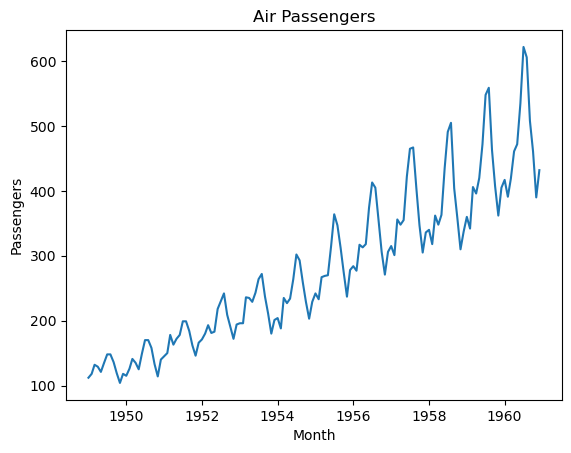

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('data-sets/air_passengers.csv')

# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

df['Passengers'] = df
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Air Passengers')
plt.show()

## Determine p,d,q,s parameters and clear trend and seasonality

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# d = # of differencing

# First, test for stationarity

result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# This part is wrong we should take 2nd order differencing or more.
# Change the if loop
# If p-value > 0.05, the series is non-stationary, we need to take differences
if result[1] > 0.05:
    df['diff_1'] = df['Passengers'].diff()
    result = adfuller(df['diff_1'].dropna())
    print('ADF Statistic after 1st diff: %f' % result[0])
    print('p-value after 1st diff: %f' % result[1])
    d = 1
else:
    d = 0
df.dropna()
    
# s = seasonality component
s = 12
df 
# Then, decompose the series to find the seasonal component
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive', period=s)

train_size = int(len(df) * 0.8)
test_size = int(len(df) * 0.2)

df['seasonal'] = decomposition.seasonal

df['normalized_residual'] = df['diff_1'] - df['seasonal']

df['trend'] = df['Passengers'] - df['diff_1']
df.dropna(inplace=True)  # Drop rows with NaN values
# Detrend and deseasonalize by dividing by the trend and seasonal components
#df['detrended'] = df['Passengers'] / df['trend']
#df['deseasonalized'] = df['detrended'] / df['seasonal']


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:

# Normalized residual
#df['normalized_residual']=(df['residual'] - df['residual'].min()) / (df['residual'].max() - df['residual'].min())
#plt.plot(df['normalized_residual'])


In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# p = AR component
p = 2

for i in range(1, p+1):
    df[f'lag_{i}'] = df['normalized_residual'].shift(i)


# q = MA component
q = 1

df['rolling_mean'] = df['normalized_residual'].rolling(window=q).mean()

df.dropna(inplace=True)  # Drop rows with NaN values

df

,Passengers,diff_1,seasonal,normalized_residual,trend,lag_1,lag_2,rolling_mean
Month,,,,,,,,
1949-04-01,129,-3.0,-8.036616,5.036616,132.0,16.241162,42.188131,5.036616
1949-05-01,121,-8.0,-4.506313,-3.493687,129.0,5.036616,16.241162,-3.493687
1949-06-01,135,14.0,35.402778,-21.402778,121.0,-3.493687,5.036616,-21.402778
1949-07-01,148,13.0,63.830808,-50.830808,135.0,-21.402778,-3.493687,-50.830808
1949-08-01,148,0.0,62.823232,-62.823232,148.0,-50.830808,-21.402778,-62.823232
...,...,...,...,...,...,...,...,...
1960-08-01,606,-16.0,62.823232,-78.823232,622.0,23.169192,27.597222,-78.823232
1960-09-01,508,-98.0,16.520202,-114.520202,606.0,-78.823232,23.169192,-114.520202
1960-10-01,461,-47.0,-20.642677,-26.357323,508.0,-114.520202,-78.823232,-26.357323


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # for example

# Select features and target
X = df[['lag_1', 'lag_2', 'rolling_mean']]
y = df['normalized_residual']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



## Bayesian Oprimization for Hyperparameter Tuning

In [6]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.plots import plot_objective, plot_histogram
import skopt
import numpy as np
from sklearn.svm import SVR

# Decleartions for deprecated functions in numpy
np.float = float    
np.int = int    
np.object = object    
np.bool = bool    

# Define hyperparameters for bayesian optimization
param_space = {
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'C': (1e-6, 1e+1, 'log-uniform'),
    'gamma': (1e-6, 1e+1, 'log-uniform'),
    'epsilon': (1e-6, 1e+6, 'log-uniform')
    }


kFold = KFold(n_splits=3, shuffle=True, random_state=10)

model = SVR()

bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, cv= kFold, n_jobs=-1, 
                             scoring='neg_mean_absolute_percentage_error', n_iter=5)

bayes_search.fit(X_train, y_train)

# Print the cross validation results
cv_results = bayes_search.cv_results_
cv_results_df = pd.DataFrame(cv_results)

cv_results_df['kernel'] = cv_results_df['params'].apply(lambda x: x['kernel'])
cv_results_df['C'] = cv_results_df['params'].apply(lambda x: x['C'])
cv_results_df['gamma'] = cv_results_df['params'].apply(lambda x: x['gamma'])
cv_results_df['epsilon'] = cv_results_df['params'].apply(lambda x: x['epsilon'])


print(cv_results_df[['mean_test_score', 'kernel', 'C', 'gamma', 'epsilon']])

# plot_objective creates pairwise dependence plot of the objective function.
# plot_objective(bayes_search.optimizer_results_[0],
#                    dimensions=["C", "gamma", "epsilon"],
#                    n_minimum_search=int(1e8))

# Print the best hyperparameters
print('Best hyperparameters:', bayes_search.best_params_)

best_model = bayes_search.best_estimator_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


29


,normalized_residual
Month,
1958-08-01,-48.823232
1958-09-01,-117.520202
1958-10-01,-24.357323
1958-11-01,4.593434
1958-12-01,55.619949
1959-01-01,47.748737
1959-02-01,18.188131
1959-03-01,66.241162
1959-04-01,-1.963384


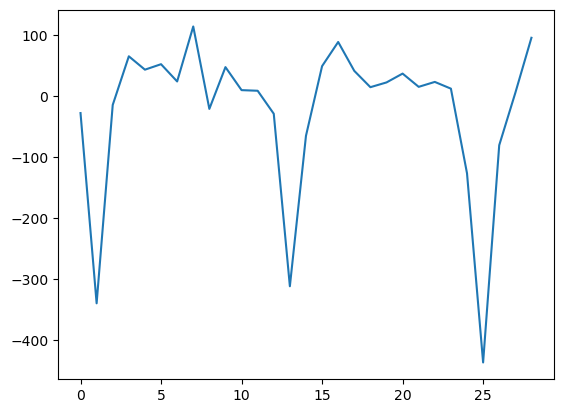

In [7]:

best_model.fit(X_train, y_train)

# Predict residuals
residuals_predicted = best_model.predict(X_test)
plt.plot(residuals_predicted)
print(len(residuals_predicted))
test_df = pd.DataFrame(y_test)
test_df

In [8]:
df['trend_train'] = df['trend'][:train_size]
df['trend_test'] = df['trend'][train_size:]
df['seasonal_train'] = df['seasonal'][:train_size]
df['seasonal_test'] = df['seasonal'][train_size:]
print(df['seasonal'][train_size:].shape)
print(df['seasonal_test'].shape)

(26,)
(141,)


(29,)
(141,)
(141,)
DatetimeIndex(['1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01',
               '1958-12-01', '1959-01-01', '1959-02-01', '1959-03-01',
               '1959-04-01', '1959-05-01', '1959-06-01', '1959-07-01',
               '1959-08-01', '1959-09-01', '1959-10-01', '1959-11-01',
               '1959-12-01', '1960-01-01', '1960-02-01', '1960-03-01',
               '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01',
               '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01',
               '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)


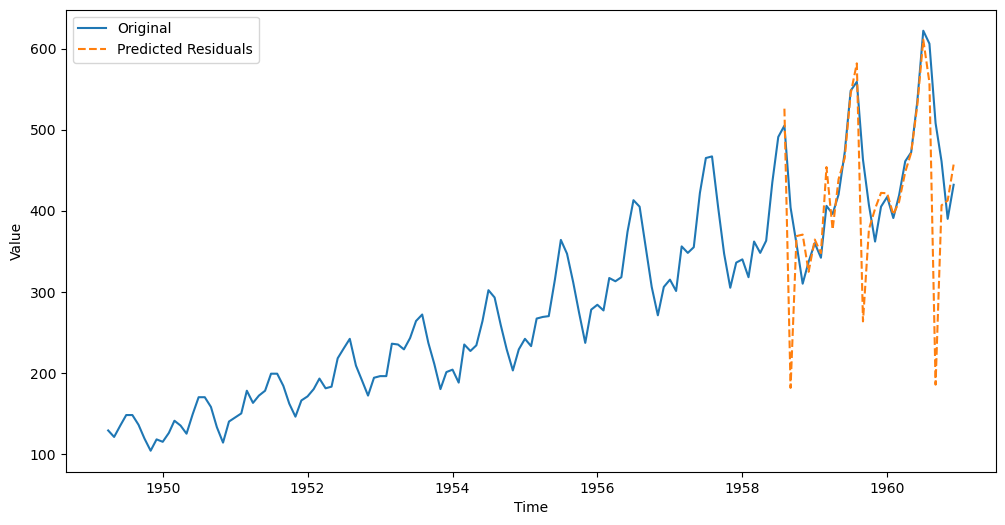

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the predicted residuals
residuals_predicted_df = pd.DataFrame(residuals_predicted, index=X_test.index, columns=['predicted_residuals'])

# Denormalize data
#residuals_predicted_df = (residuals_predicted_df - residuals_predicted_df.min()) / (residuals_predicted_df.max() - residuals_predicted_df.min())

print(residuals_predicted_df['predicted_residuals'].shape)
print(df['seasonal_test'].shape)
print(df['trend_test'].shape)
# Add trend and seasonality back to the perdicted residual
residuals_predicted_df['reconstructed'] = df['trend'] + df['seasonal'] + residuals_predicted_df['predicted_residuals']


# Plot
fig, ax = plt.subplots(figsize=(12,6))

# Plot the latter part of the original time series
ax.plot(df.loc[df.index, 'Passengers'], label='Original')

# Plot the predicted residuals
ax.plot(residuals_predicted_df['reconstructed'], label='Predicted Residuals', linestyle='--')

print(residuals_predicted_df['reconstructed'].index)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import math

# Assuming 'Passengers' is your original data and 'reconstructed' is your predicted data
mse = mean_squared_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
rmse = math.sqrt(mse)
nrmse = rmse / (df.loc[X_test.index, 'Passengers'].max() - df.loc[X_test.index, 'Passengers'].min())
r2e = r2_score(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
mape = mean_absolute_percentage_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Normalized Root Mean Squared Error:", nrmse)
print("R Squared Error: ", r2e)
print("MAPE", mape)

Mean Squared Error:  7273.103723126557
Root Mean Squared Error:  85.2824936497905
Normalized Root Mean Squared Error: 0.27334132580061055
R Squared Error:  -0.1914351322761665
MAPE 0.09845375871430508
